In [52]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook
from astropy import constants as c

from astropy.wcs import WCS as WCS

In [7]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]

In [8]:
#データにアクセス
data = hdu.data
## numpy.ndarray objectでデータを返す

#headerにアクセス
header = hdu.header
## astropy.io.fits.header.Headerでheaderを返す

In [9]:
cube = sc.read(hdu)

In [11]:
#速度範囲の切り出し
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

In [13]:
mom0 = subcube.moment(order=0)
mom1 = subcube.moment(order=1)
mom2 = subcube.moment(order=2)

In [15]:
# hduにする
hdu_mom0 = mom0.hdu

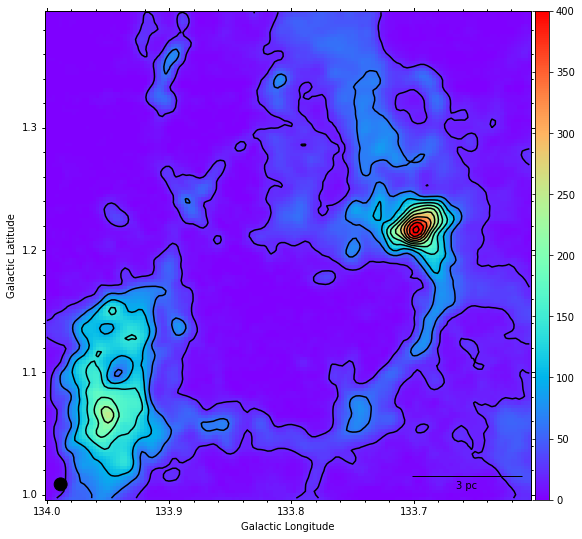

In [19]:
f = aplpy.FITSFigure(hdu_mom0)
f.show_colorscale(vmax=400, vmin=0, cmap='rainbow')
# 軸の表記を変換
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

# カラーバー
f.add_colorbar()

#contour
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')

#スケールバー
f.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f.add_beam()
f.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')

In [30]:
cube

SpectralCube with shape=(101, 144, 143) and unit=K:
 n_x:    143  type_x: GLON-SFL  unit_x: deg    range:   133.605365 deg:  133.999962 deg
 n_y:    144  type_y: GLAT-SFL  unit_y: deg    range:     0.997222 deg:    1.394445 deg
 n_s:    101  type_s: VELO      unit_s: m / s  range:   -70000.000 m / s:  -20000.000 m / s

In [54]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]
data = hdu.data
header = hdu.header

# world coordinate objectの作成

wcs = WCS(hdu)

In [55]:
# pix to coord conversion

x, y, z = wcs.wcs_world2pix(133.7,1.2,-30,0)

In [56]:
print(x, y, z)

107.95656990005352 72.99997951456095 139.94


In [6]:
hdu_ = fits.open('/mnt/sirius/home1/amigos/sakamoto/NGC1333/data/Arizona_radio_observatory/12CO/NGC1333_12CO.FITS')

In [10]:
cube_ = sc.read(hdu_)

In [21]:
#速度範囲の切り出し
subcube_ = cube_.spectral_slab(3.4*u.km/u.s, 11.8*u.km/u.s)
subcube_ = subcube_.with_spectral_unit(u.km/u.s)

In [22]:
mom0_ = subcube_.moment(order=0)
mom1_ = subcube_.moment(order=1)
mom2_ = subcube_.moment(order=2)

/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/spectral_cube/_moments.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


In [23]:
# hduにする
hdu_mom0_ = mom0_.hdu

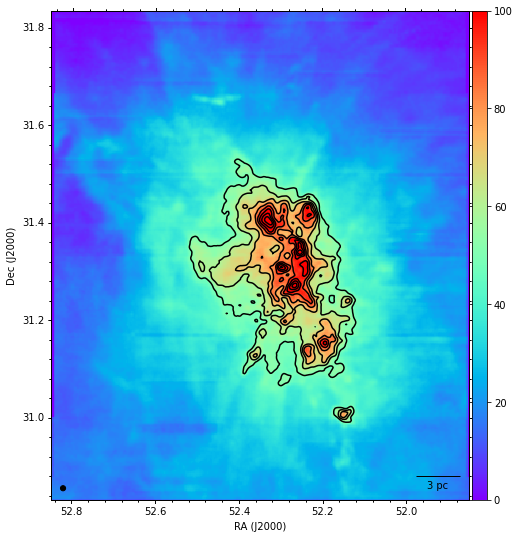

In [29]:
f_ = aplpy.FITSFigure(hdu_mom0_)
f_.show_colorscale(vmax=100, vmin=0, cmap='rainbow')
# 軸の表記を変換
f_.set_xaxis_coord_type('scalar')
f_.set_yaxis_coord_type('scalar')

# カラーバー
f_.add_colorbar()

#contour
f_.show_contour(levels=np.linspace(0,20,21)*10+50, colors='black')

#スケールバー
f_.add_scalebar(0.08999993250009113, '3 pc', color = 'black')

#ビームサイズ
f_.add_beam()
f_.beam.set_color('black')
#savefig_in_notebook(f, 'test.pdf')

In [40]:
savefig_in_notebook(f_, 'test_sakamoto_.pdf')

INFO: Auto-setting resolution to 53.1273 dpi [aplpy.core]


In [31]:
cube_

SpectralCube with shape=(133, 361, 308) and unit=K:
 n_x:    308  type_x: RA---SFL  unit_x: deg    range:    51.847259 deg:   52.851016 deg
 n_y:    361  type_y: DEC--SFL  unit_y: deg    range:    30.833335 deg:   31.833335 deg
 n_s:    133  type_s: VELO      unit_s: m / s  range:   -14925.000 m / s:   24675.000 m / s

In [38]:
cube_.spectral_axis[0]

<Quantity -14925. m / s>

In [41]:
cube_.shape

(133, 361, 308)

In [ ]:
ktrot_fits,d,h,nd,nh,20,x0=72,y0=72   

In [60]:
wcs = WCS(hdu_[0])

In [62]:
wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SFL'  'DEC--SFL'  'VELOCITY'  ''  
CRVAL : 52.3475022777  31.4166680367  -15000.0  0.0  
CRPIX : 155.0  211.0  0.75  0.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.00277777790935  0.00277777790935  300.0  1.0  
NAXIS : 308  361  133  1

# 問題

1. 天体までの距離が2 kpc, スケールバーの長さを5 pc とした時, スケールバーの長さは何arcminになりますか？

2. 天体までの距離とスケールバーの長さをpc単位で指定すると, 天空上でのスケールバーの長さをarcmin単位で計算してくれる関数を作りましょう

# 問題

1. 上の図で色々なカラーマップを試して気に入ったものを見つける
2. スケールをログスケールに変えてみる

# 練習問題

1. 1次モーメントマップを描画してみよう
2. 2次モーメントマップを描画してみよう
3. spectral_cubeを使わずに, numpyだけで全積分強度図を作ってみよう


In [47]:
c.pc

<<class 'astropy.constants.iau2015.IAU2015'> name='Parsec' value=3.0856775814671916e+16 uncertainty=0.0 unit='m' reference='Derived from au'>

In [51]:
np.rad2deg(np.arcsin(5/2000))*60

8.594375879453077

In [ ]:
cube_.hdu.writeto